# 1. Random Variable and Probability

In [2]:
from scipy import stats

### CDF of Normal Distribution

In [3]:
### Probability of a studnt who scored less than 70

In [4]:
stats.norm.cdf(x=70,loc=50,scale=30)

0.7475074624530771

### Probability of a studnt who scored more than 70

In [5]:
1-stats.norm.cdf(x=70,loc=50,scale=30)

0.2524925375469229

In [6]:
stats.norm.cdf(x=680,loc=711,scale=29)

0.14254260383881612

### Probability of Students scoring between 697 and 711

In [7]:
(stats.norm.cdf(x=740,loc=711,scale=29)-stats.norm.cdf(x=697,loc=711,scale=29))

0.5267111786415019

# 2. Normal Distribution

In [8]:
import pandas as pd

In [10]:
glaxo_data=pd.read_csv('GLAXO.csv')

In [11]:
beml_data=pd.read_csv('BEML.csv')

In [59]:
glaxo_data.head(20)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.00,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.00,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.00,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.00,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.00,1639.80,28035.0,459.11
5,2010-01-11,1659.00,1694.95,1601.05,1630.00,1629.45,10566.0,173.40
6,2010-01-12,1630.00,1635.00,1578.00,1592.00,1583.85,47274.0,756.75
7,2010-01-13,1592.00,1605.90,1566.00,1568.00,1571.30,20709.0,327.53
8,2010-01-14,1580.00,1595.00,1562.40,1572.20,1573.55,13453.0,212.09
9,2010-01-15,1581.10,1585.00,1565.00,1565.15,1570.40,6408.0,101.06


## beml_data.head(20)

In [15]:
glaxo_data.shape

(1739, 8)

In [16]:
beml_data.shape

(1739, 8)

In [17]:
beml_data_daily_trade=beml_data[['Date','Close']]
glaxo_data_daily_trade=glaxo_data[['Date','Close']]

In [19]:
glaxo_data_daily_trade.dtypes

Date      object
Close    float64
dtype: object

In [24]:
glaxo_data_daily_trade.Date=pd.to_datetime(glaxo_data_daily_trade.Date)
beml_data_daily_trade.Date=pd.to_datetime(beml_data_daily_trade.Date)

C:\Users\smbas\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
glaxo_data_daily_trade.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [28]:
beml_data_daily_trade.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [29]:
glaxo_data_daily_trade.head(20)

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
5,2010-01-11,1629.45
6,2010-01-12,1583.85
7,2010-01-13,1571.30
8,2010-01-14,1573.55
9,2010-01-15,1570.40


In [31]:
beml_data_daily_trade.head(20)

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
5,2010-01-11,1137.00
6,2010-01-12,1143.65
7,2010-01-13,1142.25
8,2010-01-14,1148.20
9,2010-01-15,1207.05


## Data Visualization for analysis

In [45]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Close Price')

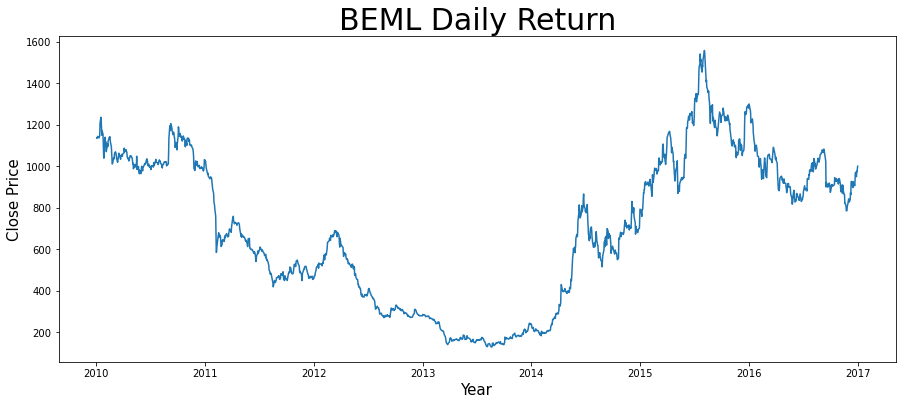

In [46]:
plt.figure(figsize=(15,6))
plt.plot(beml_data_daily_trade.Date,beml_data_daily_trade.Close)
plt.title("BEML Daily Return",size=30)
plt.xlabel('Year',size=15)
plt.ylabel('Close Price',size=15)

Text(0, 0.5, 'Close Price')

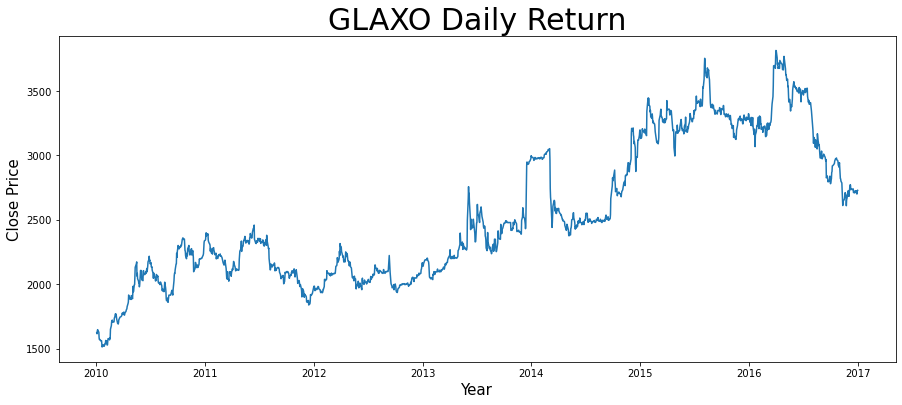

In [44]:
plt.figure(figsize=(15,6))
plt.plot(glaxo_data_daily_trade.Date,glaxo_data_daily_trade.Close)
plt.title("GLAXO Daily Return",size=30)
plt.xlabel('Year',size=15)
plt.ylabel('Close Price',size=15)

## Understanding Gain

In [48]:
beml_data_daily_trade['Gain']=beml_data_daily_trade.Close.pct_change(periods=1)
glaxo_data_daily_trade['Gain']=glaxo_data_daily_trade.Close.pct_change(periods=1)

# Data Cleaning

In [62]:
glaxo_data_daily_trade.dropna(inplace=True)
beml_data_daily_trade.dropna(inplace=True)

In [63]:
beml_data_daily_trade.head(20)

,Date,Close,Gain
1,2010-01-05,1134.60,-0.000881
2,2010-01-06,1139.60,0.004407
3,2010-01-07,1144.15,0.003993
4,2010-01-08,1144.05,-0.000087
5,2010-01-11,1137.00,-0.006162
6,2010-01-12,1143.65,0.005849
7,2010-01-13,1142.25,-0.001224
8,2010-01-14,1148.20,0.005209
9,2010-01-15,1207.05,0.051254
10,2010-01-18,1236.25,0.024191


In [64]:
glaxo_data_daily_trade.head(20)

,Date,Close,Gain
1,2010-01-05,1616.80,-0.005444
2,2010-01-06,1638.50,0.013422
3,2010-01-07,1648.70,0.006225
4,2010-01-08,1639.80,-0.005398
5,2010-01-11,1629.45,-0.006312
6,2010-01-12,1583.85,-0.027985
7,2010-01-13,1571.30,-0.007924
8,2010-01-14,1573.55,0.001432
9,2010-01-15,1570.40,-0.002002
10,2010-01-18,1562.50,-0.005031


In [65]:
glaxo_data_daily_trade.dtypes

Date     datetime64[ns]
Close           float64
Gain            float64
dtype: object

Text(0, 0.5, 'Gain')

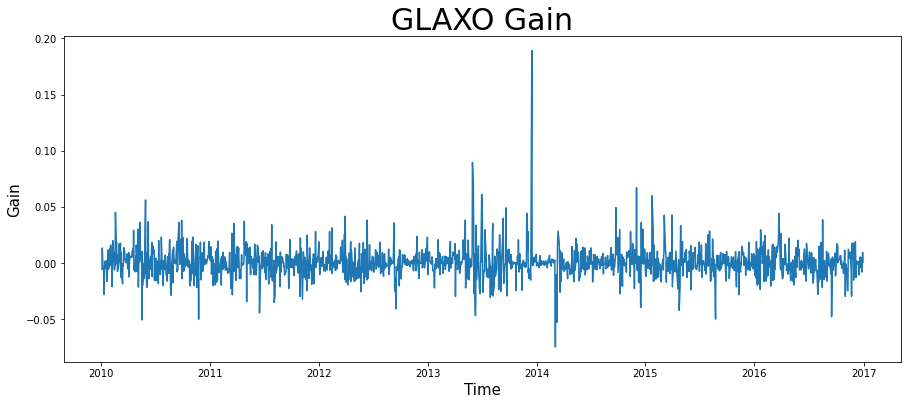

In [66]:
plt.figure(figsize=(15,6))
plt.plot(glaxo_data_daily_trade.Date,glaxo_data_daily_trade.Gain)
plt.title("GLAXO Gain",size=30)
plt.xlabel('Time',size=15)
plt.ylabel('Gain',size=15)

Text(0, 0.5, 'Gain')

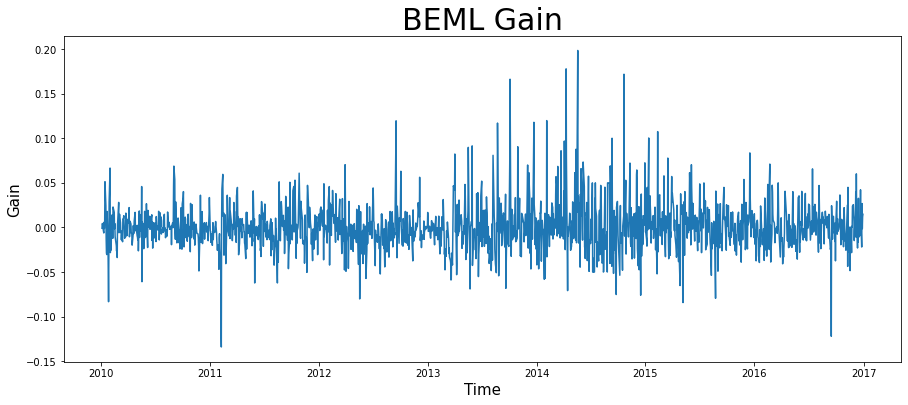

In [67]:
plt.figure(figsize=(15,6))
plt.plot(beml_data_daily_trade.Date,beml_data_daily_trade.Gain)
plt.title("BEML Gain",size=30)
plt.xlabel('Time',size=15)
plt.ylabel('Gain',size=15)

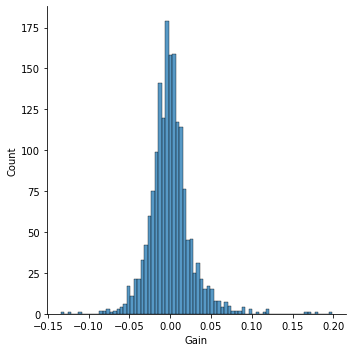

In [73]:
import seaborn as sns
sns.displot(beml_data_daily_trade,x='Gain')

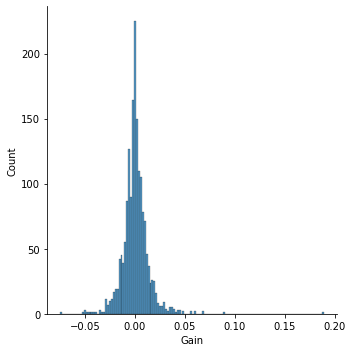

In [74]:
sns.displot(glaxo_data_daily_trade,x='Gain')

In [89]:
print("Mean of GLAXO:",round(glaxo_data_daily_trade.Gain.mean(),4))
print("STD of GLAXO:",round(glaxo_data_daily_trade.Gain.std(),4))

Mean of GLAXO: 0.0004
STD of GLAXO: 0.0134


In [87]:
print("Mean of BEML:",round(beml_data_daily_trade.Gain.mean(),4))
print("STD of BEML:",round(beml_data_daily_trade.Gain.std(),4))

Mean of BEML: 0.0003
STD of BEML: 0.0264


In [100]:
#Probability of making 2% Loss or Higher in GLaxo
stats.norm.cdf(x=-.02,loc=0.0004,scale=0.0134)
#There will be 6% chance what you will lose 2% of your money

0.06395593743937553

In [101]:
#Probability of making 2% Loss or Higher in BEML
stats.norm.cdf(x=-0.02,loc=0.0003,scale=0.0264)
#There will be 22% chance what you will lose 2% of your money

0.22096464496279805

In [104]:
#Probability of making 2% Gain or Higher in GLaxo
1-stats.norm.cdf(x=0.02,loc=0.0004,scale=0.0134)
#There will be 71% chance what you will Gain 2% of your money
#(1-) because cdf gives area under curve under left side

0.07177658173190637

In [107]:
#Probability of making 2% Gain or Higher in BEML
1-stats.norm.cdf(x=0.02,loc=0.0003,scale=0.0264)
#There will be 23% chance what you will gain 2% of your money

0.2277696435431158